### **Overview:**

A notebook to manually inspect dataset that is used to train SBR_Net model. 

A qualitative and quantitative inspection of dataset (stack, rfv, and ground truth).

### **Summary:**
1) dataset is non-vasculature
2) dtype of dataset is uint16, with max val. of 65535
3) When visualizing, use maximum intensity projection method due to images possessing multiple channels.


In [53]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import numpy as np
import tifffile

from tifffile import TiffFile
from data_loader import read_pq_file

In [57]:
# Vasculature dataset
# input_file_path = "/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/vasc/15/metadata.pq"

# Non-vasculature datset
input_file_path = "metadata.pq"
stack_path, rfv_path, truth_path = read_pq_file(input_file_path)

print("stack file path: ", stack_path, "\n")
print("rfv file path: ", rfv_path, "\n")
print("ground_truth path: ", truth_path, "\n")

stack file path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/15/stack_scattering/meas_299.tiff 

rfv file path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/15/rfv_scattering/meas_299.tiff 

ground_truth path:  /ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/gtbeads/sim_gt_vol_299.tif 



### Checking for:
1) Presence of NaNs in the data. If yes, their indices will be printed
2) array type, array dtype
3) min. and max. vals of the array

In [40]:
path_list = [stack_path, rfv_path, truth_path]
name_list = ["stack", "rfv", "ground_truth"]

for idx, path in enumerate(path_list):
    with TiffFile(path) as f:
        arr = f.asarray()

    arr_type = type(arr)
    arr_dtype = arr.dtype
    arr_shape = arr.shape

    if np.isnan(arr).any():
        nan_indices = np.argwhere(np.isnan(arr))
        print(f"{name_list[idx]} array contains NaNs at indices: {nan_indices}\n")
    else:
        print(f"{name_list[idx]} array contains no NaNs \n")

    print(f"arr_type of {name_list[idx]} is {arr_type}")
    print(f"arr_dtype of {name_list[idx]} is {arr_dtype}")
    print(f"arr_shape of {name_list[idx]} is {arr_shape}")
    print(f"min. value of {name_list[idx]} array is {arr.min()}")
    print(f"max. value of {name_list[idx]} array is {arr.max()}\n")


stack array contains no NaNs 

arr_type of stack is <class 'numpy.ndarray'>
arr_dtype of stack is uint16
arr_shape of stack is (9, 512, 512)
min. value of stack array is 0
max. value of stack array is 65534

rfv array contains no NaNs 

arr_type of rfv is <class 'numpy.ndarray'>
arr_dtype of rfv is uint16
arr_shape of rfv is (24, 512, 512)
min. value of rfv array is 0
max. value of rfv array is 65534

ground_truth array contains no NaNs 

arr_type of ground_truth is <class 'numpy.ndarray'>
arr_dtype of ground_truth is uint16
arr_shape of ground_truth is (24, 512, 512)
min. value of ground_truth array is 0
max. value of ground_truth array is 65535



### Visualizing non-normalized and normalized images: stack, rfv, and truth

Before normalization for stack: 
Min. val.:  0.0
Max. val.:  65534.0
After normalization for stack: 
Min. val.:  0.0
Max. val.:  0.9999847412109375


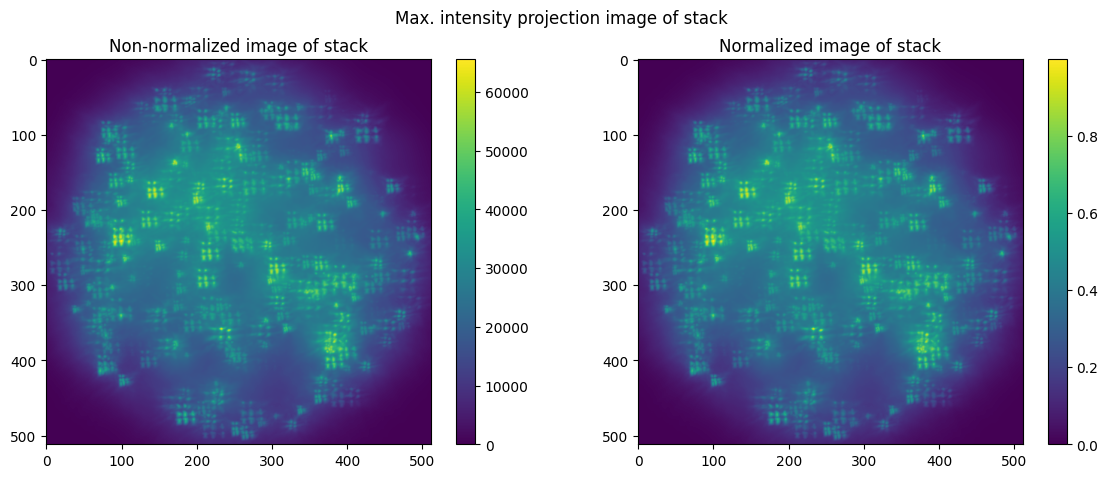

Before normalization for rfv: 
Min. val.:  0.0
Max. val.:  65534.0
After normalization for rfv: 
Min. val.:  0.0
Max. val.:  0.9999847412109375


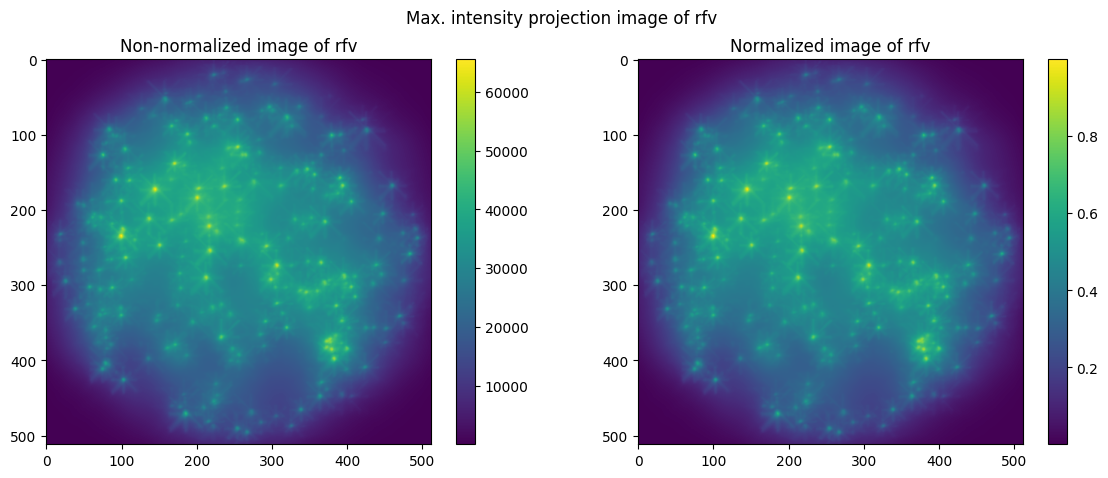

Before normalization for ground_truth: 
Min. val.:  0.0
Max. val.:  65535.0
After normalization for ground_truth: 
Min. val.:  0.0
Max. val.:  1.0


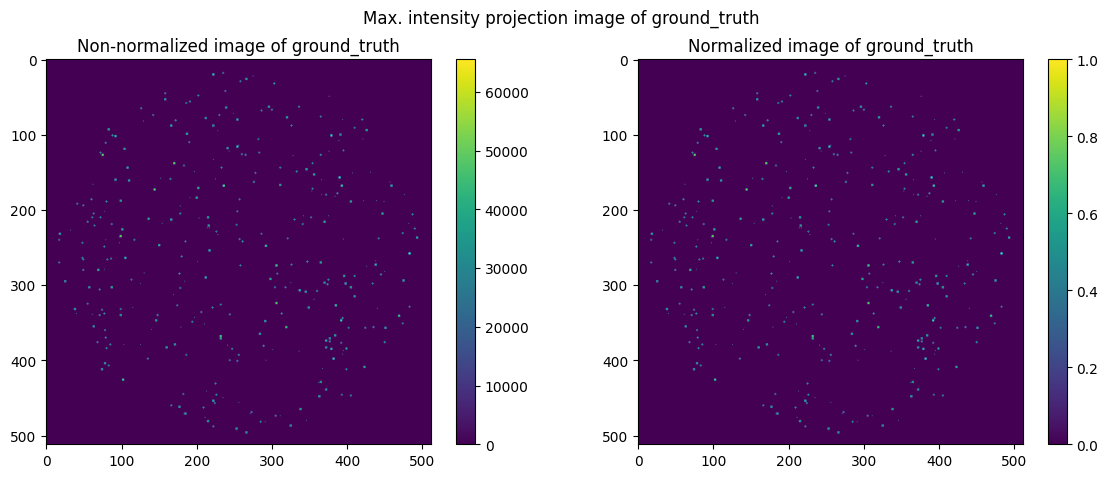

In [41]:
for idx, path in enumerate(path_list):
    img = tifffile.imread(path)
    img_tensor = torch.tensor(img, dtype=torch.float32)
    normalized_img_tensor = img_tensor / 65535.0

    # Using max. intensity projection (mip) to visualize img. with mult. channels
    img_mip = np.max(img, axis=0)
    normalized_img_mip = normalized_img_tensor.max(dim=0).values

    print(f"Before normalization for {name_list[idx]}: ")
    print("Min. val.: ", img_tensor.min().item())
    print("Max. val.: ", img_tensor.max().item())

    print(f"After normalization for {name_list[idx]}: ")
    print("Min. val.: ", normalized_img_tensor.min().item())
    print("Max. val.: ", normalized_img_tensor.max().item())

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_mip)
    plt.colorbar()
    plt.title(f"Non-normalized image of {name_list[idx]}")

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_img_mip.numpy())
    plt.colorbar()
    plt.title(f"Normalized image of {name_list[idx]}")

    plt.suptitle(f"Max. intensity projection image of {name_list[idx]}")
    plt.show()